In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## Vehicular-Related Accidents

In [32]:
#daylight savings was march 8th 2020, so for the days 
#around DST how many vehicular accidents were there?
"""
datasource:
datasource = https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2020/National/
specifically: FARS2020NationalCSV.zip
"""
accidents2020 = pd.read_csv("PROJECT1/2020accident.CSV")

In [33]:
accidents2020

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,ARR_HOUR,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,DRUNK_DR
0,1,Alabama,10001,1,1,0,0,4,4,0,...,3,3:00am-3:59am,10,10,99,Unknown,99,Unknown EMS Hospital Arrival Time,3,1
1,1,Alabama,10002,4,4,0,0,6,6,0,...,17,5:00pm-5:59pm,26,26,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
2,1,Alabama,10003,2,2,0,0,2,2,0,...,15,3:00pm-3:59pm,15,15,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
3,1,Alabama,10004,1,1,0,0,5,5,0,...,99,Unknown EMS Scene Arrival Hour,99,Unknown EMS Scene Arrival Minutes,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,0,0:00am-0:59am,55,55,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35761,56,Wyoming,560111,2,2,0,0,2,2,0,...,16,4:00pm-4:59pm,57,57,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0
35762,56,Wyoming,560112,3,3,0,0,8,8,0,...,18,6:00pm-6:59pm,19,19,18,6:00pm-6:59pm,50,50,2,0
35763,56,Wyoming,560113,3,3,0,0,9,9,0,...,17,5:00pm-5:59pm,33,33,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,0
35764,56,Wyoming,560114,2,2,0,1,3,3,1,...,20,8:00pm-8:59pm,22,22,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,0


In [34]:
"""STEPS:
- columns we need are:DAY, MONTHNAME, FATALS 
- create filters for data we only need
- we want to look at the week before and week after DST
    *sunday before march 8th was March 1st """

days = list(range(1,15))
#also removing Arizona  & Hawaii since they don't observe DST
days_around_DST = accidents2020[(accidents2020["MONTHNAME"] == "March") & (accidents2020["DAY"].isin(days)) & \
                               (accidents2020["STATENAME"] != "Arizona") &\
                                (accidents2020["STATENAME"] != "Hawaii")]

In [37]:
#now we want to only look at the fatalities around those dates rather than by state
days_around_DST.groupby("DAY")["FATALS"].sum()

DAY
1     110
2      92
3      84
4      88
5      86
6      98
7     105
8     104
9      79
10     82
11     80
12     66
13     98
14    109
Name: FATALS, dtype: int64

Text(0, 0.5, 'Fatalities')

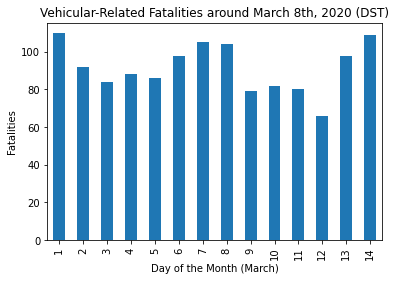

In [40]:
#plotting the above results
days_around_DST.groupby("DAY")["FATALS"].sum().plot.bar()
plt.title('Vehicular-Related Fatalities around March 8th, 2020 (DST)')
plt.xlabel('Day of the Month (March)')
plt.ylabel('Fatalities')

In [41]:
#plot side by side to compare fatlities of the week before and after DST
days_around_DST.groupby("DAY")["FATALS"].sum().to_clipboard()

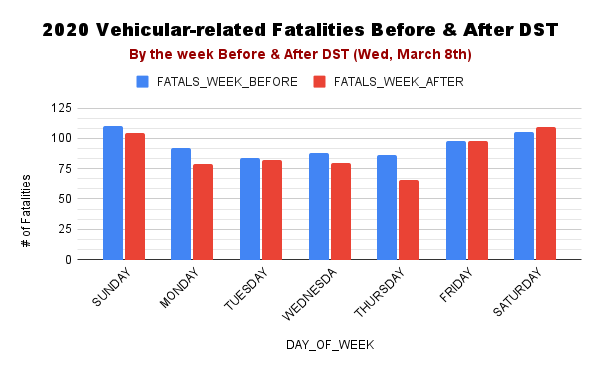

These results are interesting because it doesn't really support the theory that DST has negative effects on vehicular accident rates following the DST change. Additionally, this DST is right around when COVID-19 lockdowns began, so this data might be impacted by that.

In [48]:
#REPEAT WITH 2019 DATA to compare due to possible COVID-19 Lockdown impact
#2019 DST was Sunday March 10th, 2019
"""
datasource:
datasource = https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2019/National/
specifically: FARS2019NationalCSV.zip
"""

accidents2019 = pd.read_csv("PROJECT1/2019accident.CSV")

/Users/kimberlygonzalez/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (40,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
accidents2019

,STATE,STATENAME,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERSONS,PERMVIT,PERNOTMVIT,...,HOSP_MN,HOSP_MNNAME,CF1,CF1NAME,CF2,CF2NAME,CF3,CF3NAME,FATALS,DRUNK_DR
0,1,Alabama,10001,2,2,0,0,3,3,0,...,27,27,0,None,0,None,0,None,1,1
1,1,Alabama,10002,2,2,0,0,2,2,0,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
2,1,Alabama,10003,3,3,0,0,4,4,0,...,5,5,14,"Motor Vehicle struck by falling cargo,or somet...",0,None,0,None,1,0
3,1,Alabama,10004,1,1,0,1,1,1,1,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,0
4,1,Alabama,10005,1,1,0,0,1,1,0,...,88,Not Applicable (Not Transported),0,None,0,None,0,None,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33482,56,Wyoming,560117,1,1,0,0,1,1,0,...,99,Unknown EMS Hospital Arrival Time,0,None,0,None,0,None,1,0
33483,56,Wyoming,560118,5,5,0,0,6,6,0,...,0,0,0,None,0,None,0,None,1,0
33484,56,Wyoming,560119,1,1,0,0,1,1,0,...,21,21,0,None,0,None,0,None,1,1
33485,56,Wyoming,560120,1,1,0,0,2,2,0,...,52,52,0,None,0,None,0,None,1,1


In [50]:
"""STEPS:
- columns we need are:DAY, MONTHNAME, FATALS 
- create filters for data we only need
- we want to look at the week before and week after DST
    *sunday before march 8th was March 1st """

days = list(range(3,17))
#also removing Arizona  & Hawaii since they don't observe DST
days_around_DST_2019 = accidents2019[(accidents2019["MONTHNAME"] == "March") & (accidents2019["DAY"].isin(days)) & \
                               (accidents2019["STATENAME"] != "Arizona") &\
                                (accidents2019["STATENAME"] != "Hawaii")]

In [51]:
#now we want to only look at the fatalities around those dates rather than by state
days_around_DST_2019.groupby("DAY")["FATALS"].sum()

DAY
3      85
4      63
5      71
6      80
7      62
8      88
9     100
10    101
11     87
12     80
13     85
14     67
15     98
16    102
Name: FATALS, dtype: int64

Text(0, 0.5, 'Fatalities')

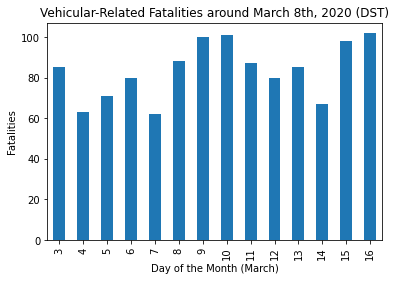

In [52]:
#plotting the above results
days_around_DST_2019.groupby("DAY")["FATALS"].sum().plot.bar()
plt.title('Vehicular-Related Fatalities around March 8th, 2020 (DST)')
plt.xlabel('Day of the Month (March)')
plt.ylabel('Fatalities')

In [53]:
#plot side by side to compare fatlities of the week before and after DST
days_around_DST_2019.groupby("DAY")["FATALS"].sum().to_clipboard()

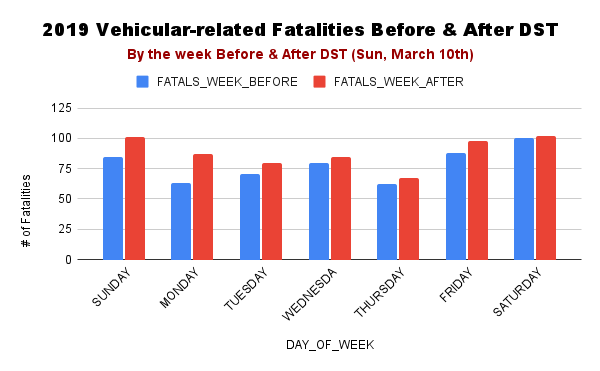

This data does show an increase in vehicular fatalities following the DST change, supporting the theory that DST has a negative imapct on driving. You can see the biggest increase occurs on the actual day of DST (sunday March 10th) as well as the following Monday (March 11th).

## Health Rates

In [65]:
#looking at health rates around DST march 8th 2020

"""
datasource:
datasource = https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=F6F0B47B90916521843A879B2D48
"""
health_rates2014_2019 = pd.read_csv("PROJECT1/Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2019.csv")

In [66]:
health_rates2014_2019

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
0,United States,2014,1,01/04/2014,54065,50189,882.0,11244.0,1654.0,1780.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2014,2,01/11/2014,56353,52450,905.0,11504.0,1735.0,1917.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2014,3,01/18/2014,54769,51043,919.0,11496.0,1660.0,1914.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2014,4,01/25/2014,54223,50560,845.0,11629.0,1602.0,1862.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2014,5,02/01/2014,54074,50402,890.0,11584.0,1586.0,1867.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16897,Puerto Rico,2019,48,11/30/2019,619,568,NaN,113.0,62.0,53.0,...,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN
16898,Puerto Rico,2019,49,12/07/2019,555,530,15.0,109.0,62.0,46.0,...,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN
16899,Puerto Rico,2019,50,12/14/2019,526,492,NaN,91.0,56.0,39.0,...,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN
16900,Puerto Rico,2019,51,12/21/2019,577,533,17.0,92.0,59.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DAYLIGHT SAVINGS DATES
Year	DST Begins	        DST Ends		
2014	March 9 (SUN)	    November 2	SUNDAY		
2015	March 8	            November 1	SUNDAY		    
2016	March 13	        November 6	SUNDAY	    
2017	March 12	        November 5	SUNDAY	
2018	March 11	        November 4	SUNDAY		
2019	March 10	        November 3	SUNDAY		    

In [71]:
weeks = [
    "03/08/2014",
    "03/15/2014",
    "03/07/2015",
    "03/14/2015",
    "03/12/2016",
    "03/19/2016",
    "03/11/2017",
    "03/18/2017",
    "03/10/2018",
    "03/17/2018",
    "03/09/2019",
    "03/16/2019"
]
#filtering by only U.S. and by the Week ending date
filtered_health = health_rates2014_2019[(health_rates2014_2019["Week Ending Date"].isin(weeks)) &  \
                      (health_rates2014_2019["Jurisdiction of Occurrence"] == "United States")]

In [73]:
filtered_health

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
9,United States,2014,10,03/08/2014,52163,48353,777.0,11535.0,1536.0,1830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,United States,2014,11,03/15/2014,51912,48111,819.0,11340.0,1584.0,1775.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,United States,2015,9,03/07/2015,56509,52369,888.0,11407.0,1727.0,2338.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,United States,2015,10,03/14/2015,55741,51560,882.0,11577.0,1650.0,2327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,United States,2016,10,03/12/2016,56233,51711,873.0,11852.0,1637.0,2262.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,United States,2016,11,03/19/2016,54585,50137,840.0,11472.0,1581.0,2290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,United States,2017,10,03/11/2017,57480,52622,840.0,11546.0,1734.0,2566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,United States,2017,11,03/18/2017,56658,52170,863.0,11424.0,1731.0,2506.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,United States,2018,10,03/10/2018,57097,52471,825.0,11640.0,1711.0,2413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,United States,2018,11,03/17/2018,56331,51735,843.0,11371.0,1686.0,2484.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
filtered_health.columns


Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All  Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J10-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)', 'flag_allcause', 'flag_natcause',
       'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz', 'flag_inflpn',
       'flag_clrd', 'flag_otherresp', 'flag_nephr', 'flag_otherunk', 'flag_hd',
       'flag_stroke'],
      dtype='object')

In [74]:
filtered_health[["Week Ending Date", "Diseases of heart (I00-I09,I11,I13,I20-I51)"]].to_clipboard()

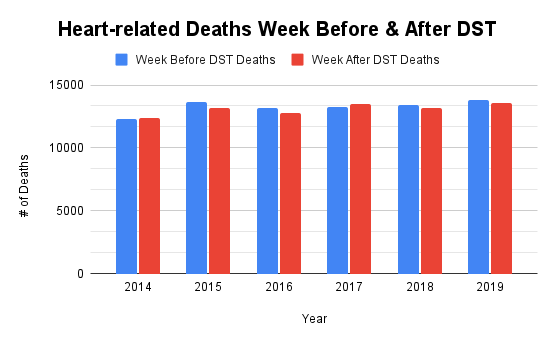

In [102]:
#repeat on flu 
filtered_health[["Week Ending Date", "Influenza and pneumonia (J10-J18)"]].to_clipboard()

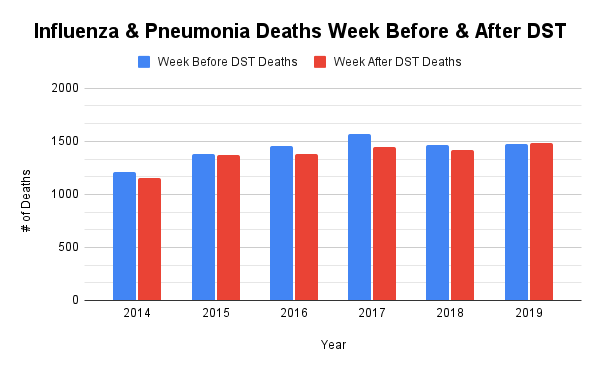

## Crime Rates

In [98]:
#https://crime-data-explorer.app.cloud.gov/pages/downloads
texas_crime_rates_2019 = pd.read_csv("PROJECT1/NIBRS_incident.csv")

In [89]:
days = [
    "03-MAR-19",
    "04-MAR-19",
    "05-MAR-19",
    "06-MAR-19",
    "07-MAR-19",
    "08-MAR-19",
    "09-MAR-19",
    "10-MAR-19",
    "11-MAR-19",
    "12-MAR-19",
    "13-MAR-19",
    "14-MAR-19",
    "15-MAR-19",
    "16-MAR-19",
    "17-MAR-19"
    
]

In [99]:
texas_wb_wa_crime_2019 = crime_rates_2019[texas_crime_rates_2019["INCIDENT_DATE"].isin(days)].groupby("INCIDENT_DATE").count()
#INCIDENT_ID IS THE NUMBER OF CRIME INCIDENTS REPORTED

In [100]:
texas_wb_wa_crime_2019

,DATA_YEAR,AGENCY_ID,INCIDENT_ID,NIBRS_MONTH_ID,CARGO_THEFT_FLAG,SUBMISSION_DATE,REPORT_DATE_FLAG,INCIDENT_HOUR,CLEARED_EXCEPT_ID,CLEARED_EXCEPT_DATE,INCIDENT_STATUS,DATA_HOME,ORIG_FORMAT,DID
INCIDENT_DATE,,,,,,,,,,,,,,
03-MAR-19,1962,1962,1962,1962,774,1962,80,1909,1962,100,1962,1962,1962,1962
04-MAR-19,2093,2093,2093,2093,1035,2093,120,2003,2093,84,2093,2093,2093,2093
05-MAR-19,2005,2005,2005,2005,907,2005,98,1934,2005,68,2005,2005,2005,2005
06-MAR-19,2044,2044,2044,2044,936,2044,92,1980,2044,69,2044,2044,2044,2044
07-MAR-19,2238,2238,2238,2238,987,2238,95,2178,2238,89,2238,2238,2238,2238
08-MAR-19,2436,2436,2436,2436,1090,2436,92,2359,2436,97,2436,2436,2436,2436
09-MAR-19,2189,2189,2189,2189,910,2189,80,2114,2189,82,2189,2189,2189,2189
10-MAR-19,2089,2089,2089,2089,798,2089,77,2032,2089,95,2089,2089,2089,2089
11-MAR-19,2253,2253,2253,2253,1041,2253,142,2157,2253,78,2253,2253,2253,2253


In [101]:
texas_wb_wa_crime_2019.to_clipboard()

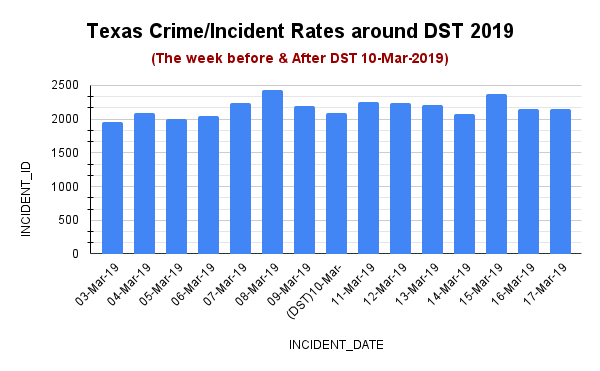